In [1]:
# ! pip install ucimlrepo
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X_original = mushroom.data.features 
y_original = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
print(mushroom.metadata['additional_info']['summary'])

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


In [4]:
X = X_original.copy()

In [5]:
print(X.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [6]:
print(X.shape)

(8124, 22)


In [7]:
print(X.columns)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [8]:
print(X['cap-shape'].value_counts(normalize=True))
shape_list = mushroom.variables.description[mushroom.variables.name == 'cap-shape'].tolist()
shape_dict = {'b': 'Bell', 'c': 'Conical', 'x': 'Convex', 'f': 'Flat', 'k': 'Knobbed', 's': 'Sunken'}
print(f'{shape_list}')

X['cap-shape'] = X['cap-shape'].map(shape_dict)
print(X['cap-shape'].head())

cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: proportion, dtype: float64
['bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s']
0    Convex
1    Convex
2      Bell
3    Convex
4    Convex
Name: cap-shape, dtype: object


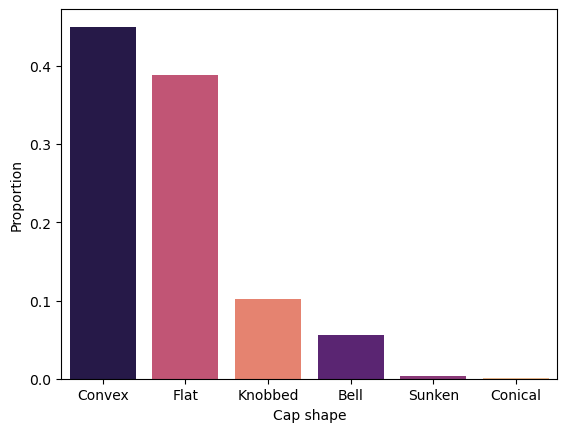

In [19]:
sns.countplot(data = X, x = 'cap-shape', order = X['cap-shape'].value_counts().index, stat = 'proportion', hue = 'cap-shape', palette = 'magma')
plt.xlabel('Cap shape')
plt.ylabel('Proportion')
plt.show()
plt.close()

In [21]:
print(X['cap-color'].value_counts(normalize=True))
print(mushroom.variables.description[mushroom.variables.name == 'cap-color'].tolist())

cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64
['brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y']
